In [984]:
#------- EXERCICI 1 --- ACABAT
import pandas as pd

data = pd.read_csv('DelayedFlights.csv')

df = data.sample(n=200000, replace=False)

df = df[[
    #'Unnamed: 0', 'Year', 'Month', 'DayofMonth',
    'DayOfWeek',
    #'DepTime',
    #'CRSDepTime', 'ArrTime', 'CRSArrTime',
    'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
    #'CRSElapsedTime',
    'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 
    #'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
    #'WeatherDelay', 'NASDelay', 'SecurityDelay',
    #'LateAircraftDelay'
    ]].copy()

En este dataset podemos encontrar información sobre los retrasos de 20 aerolíneas comerciales en los Estados Unidos en 2008. Ésta muestra del dataset contiene 30 columnas con datos sobre 200.00 vuelos tanto antes de realizarse, así como tras la finalización de los mismos. De esta manera podemos a su vez obtener información sobre retrasos, desviaciones o cancelaciones y sus causas.

Puesto que no sabría extraer información de ello, podría eliminar las dos columnas que hacen referencia a la bajada y la subida del tren de aterrizaje (TaxiIn y TaxiOut).

Por otro lado, tambien puedo eliminar todas las columnas que se refieren a los retrasos y las cancelaciones según la causa, así como a  las columnas sobre la fecha como "Year", "Month" o "DayOfMonth", como también a aquellas relacionadas con la programación original del vuelo como "CRSDepTime" o "CRSElapsedTime", ya que tampoco haré uso de estas columnas para los ejercicios que siguen.

Finalmente, modifico el nombre de las columnas para facilitar la lectura y vuelvo a indexar los registros para darles un valor entre 0 y 200.000 acorde con la totalidad de la muestra y no con la base de datos original.

In [985]:
df = df.rename(columns = {'DayOfWeek':'Day_Of_Week',
                          'UniqueCarrier':'Carrier',
                          'FlightNum':'Flight_Number',
                          'TailNum':'Tail_Number',
                          'ActualElapsedTime':'Actual_Elapsed_Time',
                          'AirTime':'Air_Time',
                          'ArrDelay':'Arrival_Delay',
                          'DepDelay':'Departure_Delay',
                          'Dest':'Destination'}) \
    .reset_index(drop=True)

In [986]:
df.describe()

,Day_Of_Week,Flight_Number,Actual_Elapsed_Time,Air_Time,Arrival_Delay,Departure_Delay,Distance
count,200000.000000,200000.000000,199114.000000,199114.000000,199114.00000,200000.000000,200000.000000
mean,3.983145,2186.129085,133.339715,108.337259,42.25624,43.252700,766.283505
std,1.996227,1942.026817,72.142180,68.797806,56.95331,53.586113,575.839706
min,1.000000,1.000000,15.000000,1.000000,-67.00000,6.000000,30.000000
25%,2.000000,613.000000,80.000000,58.000000,9.00000,12.000000,340.000000
50%,4.000000,1547.000000,116.000000,90.000000,24.00000,24.000000,607.000000
75%,6.000000,3423.000000,165.000000,137.000000,56.00000,53.000000,998.000000
max,7.000000,9741.000000,1114.000000,1091.000000,1308.00000,1286.000000,4962.000000


Al ejecutar la función describe() podemos ver que faltan algunos datos en 3 columnas, por lo que tendremos que volver a ellas más adelante.

Por otro lado, también podemos observar que el valor mínimo de la columna 'Arrival_Delay' es negativo. Esto es normal, ya que en esta misma columna se expresa mediante un valor negativo cuando el vuelo llega antes de lo programado.

Sin embargo, el valor máximo de la misma columna de 'Arrival_Delay' parece demasiado elevado en comparación con el 75% más bajo, que a penas llega a la hora de retraso, así que acto seguido mirarmos si sigue una progresión normal.

Finalmente, también podemos observar que el valor mínimo de la columna 'Distance' es muy bajo para un trayecto en avión, por lo que parece erróneo a primera vista, sin emabrgo al ver la cantidad de vuelos por distancia vemos que es normal que haya trayectos así de cortos.

<Axes: ylabel='Frequency'>

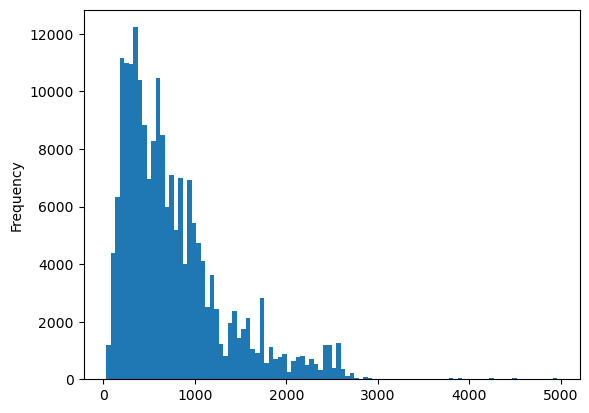

In [987]:
df['Distance'].plot(kind='hist', bins=100)
#df0 = df[['Distance', 'Origin', 'Destination']]
#df0.groupby('Distance')
#df0.sort_values(by='Distance', ascending=True)[:5]

De vuelta al valor máximo de la misma columna de 'Arrival_Delay', al consultar en un histograma la progresión del tiempo de retraso, podemos observar que es normal que algunos vuelos acumulen mucho retraso debido en gran parte a la mayor distancia entre los aeropuertos de origen y destino.

<Axes: ylabel='Frequency'>

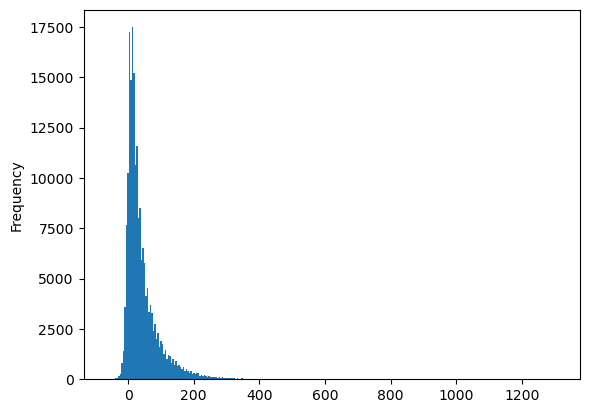

In [988]:
df['Arrival_Delay'].plot(kind='hist', bins=300)

In [989]:
#------- EXERCICI 2 --- ACABAT
### Troba quantes dades faltants hi ha per columna.
print('Los registros que faltan por columna son:')
pd.isnull(df).sum()

Los registros que faltan por columna son:


Day_Of_Week              0
Carrier                  0
Flight_Number            0
Tail_Number              0
Actual_Elapsed_Time    886
Air_Time               886
Arrival_Delay          886
Departure_Delay          0
Origin                   0
Destination              0
Distance                 0
dtype: int64

In [990]:
### Depuración: Rellenar Na con la media.
df[['Actual_Elapsed_Time', 'Air_Time', 'Arrival_Delay']] = df[['Actual_Elapsed_Time', 'Air_Time', 'Arrival_Delay']].fillna(df[['Actual_Elapsed_Time', 'Air_Time', 'Arrival_Delay']].mean())

print(df.isna().sum())

Day_Of_Week            0
Carrier                0
Flight_Number          0
Tail_Number            0
Actual_Elapsed_Time    0
Air_Time               0
Arrival_Delay          0
Departure_Delay        0
Origin                 0
Destination            0
Distance               0
dtype: int64


In [991]:
#------- EXERCICI 2 --- ACABAT
### Haz un análisis estadístico que consideres relevante.
df1 = df[['Day_Of_Week', 'Arrival_Delay']]
df1_DayOfWeek_Delay = df1.groupby('Day_Of_Week').aggregate(sum)
df1_DayOfWeek_Delay.sort_values(by='Arrival_Delay', ascending=False)

,Arrival_Delay
Day_Of_Week,
5,1.454860e+06
7,1.319233e+06
1,1.265266e+06
4,1.227602e+06
2,1.182808e+06
3,1.092208e+06
6,9.092709e+05


En esta nuevo data frame podemos ver que el mayor número de retrasos suceden los viernes (5) y los domingos (7) posiblemente debido a las idas y las vueltas del fin de semana, y que por la misma razón que el menor número de retrasos se dan en sábado (6).

In [992]:
### Crear columna velocidad mediana de los vuelos, ... ACABAT
df2 = df[['Flight_Number', 'Air_Time', 'Distance', 'Arrival_Delay', 'Departure_Delay']]
df2["Mean_Speed(m/m)"] = df2['Distance'] / df2['Air_Time']
df2.head()

C:\Users\dcuxa\AppData\Local\Temp\ipykernel_32632\2741546907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Mean_Speed(m/m)"] = df2['Distance'] / df2['Air_Time']


,Flight_Number,Air_Time,Distance,Arrival_Delay,Departure_Delay,Mean_Speed(m/m)
0,3034,113.0,809,7.0,7.0,7.159292
1,1831,127.0,861,70.0,85.0,6.779528
2,3446,206.0,1751,-8.0,11.0,8.500000
3,1403,90.0,585,16.0,27.0,6.500000
4,2278,72.0,447,55.0,58.0,6.208333


In [993]:
#------- EXERCICI 2 --- ACABAT
### Fes una taula de les aerolínies amb més endarreriments acumulats.
df3 = df[['Carrier', 'Arrival_Delay']]
df3_UniqueCarrier_ArrDelay = df3.groupby('Carrier').aggregate(sum)
df3_UniqueCarrier_ArrDelay.sort_values(by='Arrival_Delay', ascending=False)

,Arrival_Delay
Carrier,
WN,1.173567e+06
AA,9.179311e+05
UA,7.009111e+05
MQ,6.732442e+05
OO,6.338731e+05
XE,5.378525e+05
DL,4.728010e+05
CO,4.197116e+05
EV,4.034376e+05


In [994]:
#------- EXERCICI 2 --- ACABAT
### ¿Cuáles son los vuelos más largos?
df4 = df[['Flight_Number', 'Air_Time']]
df4_more_airtime = df4.groupby('Flight_Number').aggregate(sum)
df4_more_airtime.sort_values(by='Air_Time', ascending=False)[:5]

,Air_Time
Flight_Number,
15,41571.000000
16,31065.011777
17,30544.337259
73,30414.011777
1,26661.337259


In [995]:
#------- EXERCICI 2 --- ACABAT
### I els més endarrerits?
df5 = df[['Flight_Number', 'Arrival_Delay']]
df5_more_delayed = df5.groupby('Flight_Number').aggregate(sum)
df5_more_delayed.sort_values(by='Arrival_Delay', ascending=False)[:5]

,Arrival_Delay
Flight_Number,
7,8741.51248
321,8612.51248
17,8324.25624
52,7426.76872
685,7300.00000


In [996]:
#------- EXERCICI 2 --- 
### Busca les rutes mes llarges.
df6 = df[['Distance', 'Origin', 'Destination']]
df6.groupby(['Origin', 'Destination'])['Distance'].aggregate(sum)
df6.sort_values(by=['Distance'], ascending=False)[:10]

,Distance,Origin,Destination
31675,4962,EWR,HNL
44516,4962,EWR,HNL
71366,4962,EWR,HNL
139837,4962,EWR,HNL
32805,4962,EWR,HNL
40759,4962,EWR,HNL
199653,4962,EWR,HNL
181981,4962,HNL,EWR
134887,4962,EWR,HNL
35112,4962,HNL,EWR


In [997]:
#------- EXERCICI 2 --- ACABAT
### ... y las rutas que acumulan más retrasos.
df7 = df[['Arrival_Delay', 'Origin', 'Destination']]
df7.groupby('Arrival_Delay').aggregate(sum)
df7.sort_values(by=['Arrival_Delay'], ascending=False)[:5]

,Arrival_Delay,Origin,Destination
79788,1308.0,LAS,STL
196929,1230.0,PSP,MSP
154843,1193.0,SDF,DFW
109256,1186.0,LAS,ORD
177000,1142.0,SHV,ORD


In [998]:
#------- EXERCICI 2 --- 
### Aporta aquello que consideres relevante.
#df["TailNumFreq"] = df['Tail_Number'].count()
df8 = df[['Tail_Number', 'Arrival_Delay', 'Air_Time']]
df8.groupby('Arrival_Delay').aggregate(sum)
df8.sort_values(by='Arrival_Delay', ascending=False)[:5]

C:\Users\dcuxa\AppData\Local\Temp\ipykernel_32632\981567132.py:5: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df8.groupby('Arrival_Delay').aggregate(sum)


,Tail_Number,Arrival_Delay,Air_Time
79788,N244AA,1308.0,159.0
196929,N301US,1230.0,170.0
154843,N458AA,1193.0,124.0
109256,N4XFAA,1186.0,161.0
177000,N670AE,1142.0,116.0


In [1003]:
df.to_excel('Sprint_03_Tasca_02.xlsx', sheet_name='Sheet1')